<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'], ['matplotlib'], ['scipy'])
await piplite.install(['statsmodels'])
await piplite.install(['seaborn'])

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from math import sqrt
import statsmodels.api as sm
import seaborn as sns

<ipython-input-2-da587230cd78>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
from js import fetch
import io

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(boston_url)
ratings_url = io.BytesIO((await resp.arrayBuffer()).to_py())


In [4]:
boston_df = pd.read_csv(ratings_url)

In [5]:
boston_df.set_index('Unnamed: 0', inplace = True)
boston_df.rename_axis("", inplace = True)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
,,,,,,,,,,,,,
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9


## Task 2

#### 1. Median value of owner-occupied homes

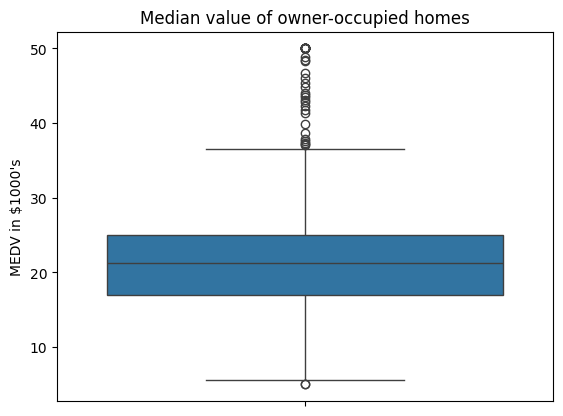

In [6]:
ax = sns.boxplot(y='MEDV', data=boston_df)
plot_t = 'Median value of owner-occupied homes'
ax.set_title(plot_t)
ax.set_ylabel("MEDV in $1000's")
plt.show()

#### 2. Charles river - tract bounds river

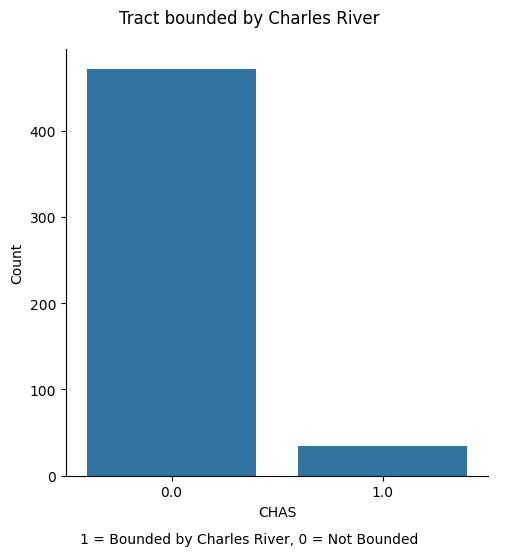

In [8]:
# Charles river - tract bounds river 
ax = sns.catplot(x = 'CHAS',  kind='count', data= boston_df)
ax.fig.suptitle('Tract bounded by Charles River', y=1.05)
ax.set_axis_labels('CHAS', 'Count')
plt.text(0.5, -0.01, '1 = Bounded by Charles River, 0 = Not Bounded', ha='center', va='center', transform=ax.fig.transFigure)
plt.show()

#### 3.Boxplot for the MEDV variable vs the AGE variable

Text(0.5, 1.0, 'MEDV vs. AGE')

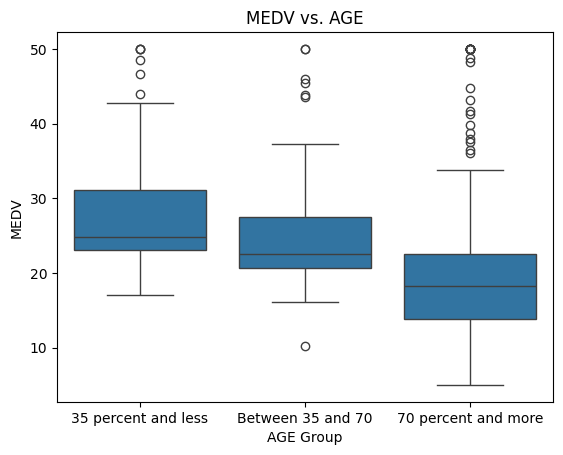

In [9]:
boston_df['AGE Group'] = None
boston_df.loc[boston_df['AGE'] <= 35,'AGE Group']  = '35 percent and less'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70),'AGE Group']= 'Between 35 and 70'
boston_df.loc[(boston_df['AGE'] >= 70),'AGE Group'] = '70 percent and more'
age_order = ['35 percent and less','Between 35 and 70', '70 percent and more']
ax = sns.boxplot(x = 'AGE Group', y  = 'MEDV', data = boston_df, order = age_order)
ax.set_title('MEDV vs. AGE')


#### 4. Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business 

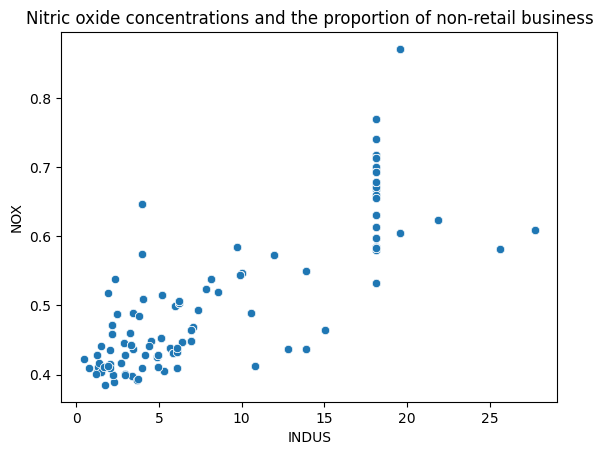

In [28]:
ax = sns.scatterplot(x='INDUS', y='NOX',
                     data=boston_df)
plt.title("Nitric oxide concentrations and the proportion of non-retail business")
plt.show()

##### What can you say about the relationship?
From looking at the data as presented by the scatterplot, there seems to be a positive relationship between INDUS and NOX in 
that the larger the proportion of land allocated for non-retail businesses is - the higher concentrations of Nitric oxide are observed.   

#### 5. Histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Pupil to teacher ratio')

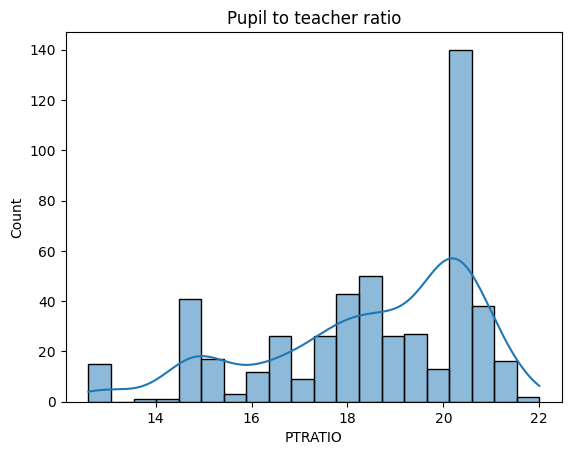

In [12]:
ax = sns.histplot(data=boston_df, x='PTRATIO', bins=20, kde=True)
ax.set_title('Pupil to teacher ratio')

## Task 3

#### 1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Hypothesis:
* $H_0:$ There is no significant difference in median value of houses bounded by the Charles river
* $H_1:$ There is a significant difference in median value of houses bounded by the Charles river
* α = 0.05

In [14]:
# Testing for equality of variance
scipy.stats.levene(boston_df[boston_df['CHAS']== 0.0]['MEDV'],
                   boston_df[boston_df['CHAS']== 1.0]['MEDV'], 
                   center='mean')

# since the p-value is less than 0.05, the variances are not equal

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [15]:
#t-test
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']== 0.0]['MEDV'],
                   boston_df[boston_df['CHAS']== 1.0]['MEDV'], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

**Conclusion:** Yes, there is a significant difference in median value of houses bounded by the Charles river. 
Since the p-value is less than alpha value 0.05, the null hypothesis is rejected as there is enough proof that there
is a statistical difference in median value of houses based on whether they are bounded by the Charles river or not.

#### 2.  Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to
1940 (AGE)? (ANOVA)

#Using the previous discretization of the AGE variable, the column is devided into three groups representing the proportion of owner-occupied units built prior to 1940.

**hypothesis**
* $H_0: µ_1 = µ_2 = µ_3$  The three group means for Median values of houses('MEDV') are equal.
* $H_1:$ At least one of the means differ.

In [17]:
# Testing for equality of variance
scipy.stats.levene(boston_df[boston_df['AGE Group'] == '35 percent and less']['MEDV'],
                   boston_df[boston_df['AGE Group'] == 'Between 35 and 70']['MEDV'],
                   boston_df[boston_df['AGE Group'] == '70 percent and more']['MEDV'],
                   center='mean')
# since the p-value is greater than 0.05, the variances are equal

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [18]:
# ANOVA
less = boston_df[boston_df['AGE Group'] == '35 percent and less']['MEDV']
mid = boston_df[boston_df['AGE Group'] == 'Between 35 and 70']['MEDV']
more = boston_df[boston_df['AGE Group'] == '70 percent and more']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(less, mid, more)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Yes, there is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE). 
Since the P-value is less than the alpha value of 0.05, the null hypothesis is rejected as there is enough proof that there is a
statistical difference in median value of MEDV based on percentage of owner occupied units built prior to 1940 (AGE).

#### 3.  Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

hypothesis:
* $H_0:$ Nitric oxide concentrations is not correlated with the proportion of non-retail business acres per town
* $H_1:$ Nitric oxide concentrations is correlated with the proportion of non-retail business acres per town

In [22]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusion:**  No. Since the p-value is less thab 0.05, the Null hypothes is rejected, and it can be concluded that a relationship does exists between Nitric oxide concentrations and proportion of non-retail business acres per town.

#### 4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Text(0.5, 1.0, ' Impact of DIS on MEDV')

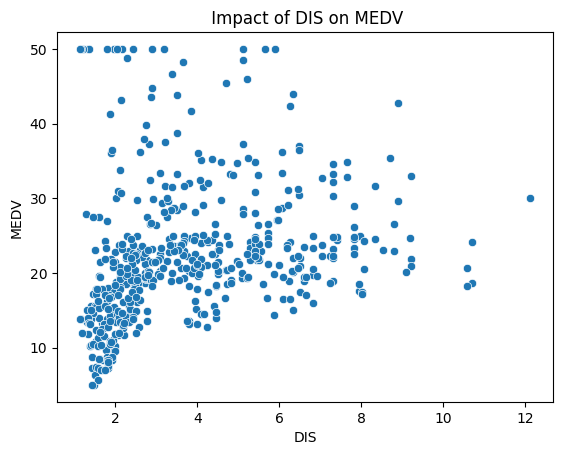

In [32]:
#Scatterplot to observe tendency
ax = sns.scatterplot(x="DIS", y="MEDV", data=boston_df)
plt.title(" Impact of DIS on MEDV")

#### hypothesis:
* $H_0:$ DIS has no impact on MEDV
* $H_1:$ DIS has an impact on MEDV

In [26]:
import statsmodels.api as sm

X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 21 Jun 2025   Prob (F-statistic):           1.21e-08
Time:                        18:22:56   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:**  

**1.** P-value: the p-value is 1.21e-08, which is significantly less than 0.05. This indicates that there is strong evidence against the null hypothesis, suggesting that the independent variable (DIS) is likely to have a meaningful impact on the dependent variable (MEDV). 

**2.** Correlation coefficient : The square root of R-squared (0.062) is 0.249, which is equal to the correlation coeffeicient. A correlation coefficient of approximately 0.249 indicates a weak positive correlation between DIS and MEDV, meaning that as the weighted distance increases, the median value of homes tends to increase slightly, though the relationship is not strong.
The weak correlation could be due to the influence of other variables not included in the model.

**3.** Positive Coefficient (coef): The positive value of 1.0916 suggests that as the weighted distance (DIS) increases by one unit, the median value of owner-occupied homes (MEDV) is expected to increase by approximately 1.0916 units, holding all other factors constant. A p-value of 0.000 for the DIS coefficient indicates that there is very strong evidence against the null hypothesis for this specific variable, suggesting that DIS has a significant impact on MEDV.